# Zero to pandas course project
### Heart disease dataset

We will now analyse data which contains the clinical factors that cause heart disease and a failure. The Heart failure clinical records Data Set is available in the UCI Machine Learning Repository. This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.  For more information on the dataset click [here](https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records).

### Downloading the dataset

There are several options for getting the dataset into Jupyter:

* Download the CSV manually and upload it via Jupyter's GUI
* Use the urlretrieve function from the urllib.request to download CSV files from a raw URL
* Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.

We'll use the opendatasets helper library to download the files.

In [1]:
#!pip install jovian opendatasets --upgrade --quiet

In [2]:
# Change this
#dataset_url = 'https://www.kaggle.com/andrewmvd/heart-failure-clinical-data/tasks?taskId=1177' 

In [3]:
# import opendatasets as od
# od.download(dataset_url)

In [4]:
# # Change this
# data_dir = './heart-failure-dataset'

In [5]:
# import os
# os.listdir(data_dir)

In [6]:
# project_name = "zerotopandas-course-project-rajalakshmi" # change this (use lowercase letters and hyphens only)

In [7]:
# !pip install jovian --upgrade -q

In [8]:
# import jovian

In [9]:
# jovian.commit(project=project_name)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
heart_raw_df = pd.read_csv('heart_failure/heart_failure_clinical_records_dataset.csv')
heart_raw_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Data Preparation and Cleaning

Let us now prepare the data and clean it, to set it ready for further exploration. 

In [12]:
row, col = heart_raw_df.shape
print(f"The heart failure dataset includes {col} clinical attributes of {row} patients")

The heart failure dataset includes 13 clinical attributes of 299 patients


#### Attribute Information:

This dataset has thirteen (13) clinical features and a brief description of them have been given below:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

Let us understand the datatype of these attributes.

In [13]:
heart_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### Check for Missing values

It is good to start by checking missing values and fixing it. Let us find out if this dataset has any missing values.

In [14]:
heart_raw_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

This dataset doesn't have any missing values. 

#### Check for unique values

In [15]:
heart_raw_df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

Out of the thirteen variables the first twelve variables are predictor variables and the target variable is "death event". There are six categorical variables namely - anaemia, high blood pressure, diabetes, sex, smoking and death event. And there are seven continuous variables - age, creatinine phosphokinase, ejection fraction, platelets, serum creatinine, serum sodium and time.

#### Check for duplicate rows

In [16]:
duplicated = heart_raw_df.duplicated().sum()

if duplicated:
    print(f"Duplicate rows in the dataset are {duplicated}")
else:
    print("There are no duplicate values in the dataset")

There are no duplicate values in the dataset


#### Handling Incorrect data

The age column has float as datatype. But age is generally an whole number. Let's check if it has any floating values and fix it. 

In [17]:
heart_raw_df[~heart_raw_df['age'].apply(lambda x:x.is_integer())]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
185,60.667,1,104,1,30,0,389000.0,1.5,136,1,0,171,1
188,60.667,1,151,1,40,1,201000.0,1.0,136,0,0,172,0


Two values in age column have decimal values. Decimal value in age column doesn't make much sense. 

Since there are only two values we will try changing it directly.

In [18]:
heart_raw_df.loc[(heart_raw_df.age == 60.667),'age'] = 61  

heart_raw_df.loc[184:189]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
184,58.0,1,145,0,25,0,219000.0,1.2,137,1,1,170,1
185,61.0,1,104,1,30,0,389000.0,1.5,136,1,0,171,1
186,50.0,0,582,0,50,0,153000.0,0.6,134,0,0,172,1
187,60.0,0,1896,1,25,0,365000.0,2.1,144,0,0,172,1
188,61.0,1,151,1,40,1,201000.0,1.0,136,0,0,172,0
189,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0


Incorrect data has been changed in the age column. Also the dataset has 13 attributes and all the columns seem essential right now. So we aren't droping any and the data is now finally set for exploration.

### Exploratory Analysis and Visualization

In [19]:
heart_raw_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Let us dig deep into these attributes and find its  count, mean, std(standard deviation), range, min , max , etc...

#### Statistics Summary

In [20]:
heart_raw_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.836120,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### I. Gender and its impact

This dataset includes both male and female patients. To begin with let us understand the number of men and women patients. Also let's check out if it has an impact on the heart disease.

In [21]:
gender_df=heart_raw_df['sex'].value_counts().to_frame()
gender_df.rename(columns = {'sex': 'Patient_Count'}, inplace = True)
gender_df.rename(index={0: 'Women', 1: 'Men'},inplace=True)
gender_df

,Patient_Count
Men,194
Women,105


We have 299 records of which 105 are women and 194 are men. So nearly two thirds of the data has been collected from men and the remaining one third from women. Let us find out if gender has an impact on the heart failure.

In [22]:
# Calculating percentage of people dead/alive in each gender group 
gender_grp_df=heart_raw_df.groupby(['sex','DEATH_EVENT']).size().groupby(level=0).apply(lambda x: 100*x/x.sum())
gender_grp_df=gender_grp_df.to_frame().reset_index()

gender_grp_df.rename(columns = {'sex':'Gender','DEATH_EVENT':'Patient_State',0: 'Percentage %'}, inplace = True)
gender_grp_df['Percentage %']= round(gender_grp_df['Percentage %'],2)  #Round of percentage to 2

gender_grp_df["Gender"].replace({0: 'Women', 1: 'Men'}, inplace=True)   #Replace boolean values to meaningful ones 
gender_grp_df["Patient_State"].replace({0: 'Alive', 1: 'Deceased'}, inplace=True)

#Using pivot table to present it in more presentable format
gender_grp_df_op = pd.pivot_table(data=gender_grp_df, index=['Gender'], columns=['Patient_State'], values='Percentage %')
gender_grp_df_op

Patient_State,Alive,Deceased
Gender,,
Men,68.04,31.96
Women,67.62,32.38


There is a slight difference betweeen men and women. The table clearly shows that 68.04% of men are alive and 67.62% of women are alive. Likewise 31.96% of the men are deceased and 32.38% of women are deceased. 

### II. Age of patients

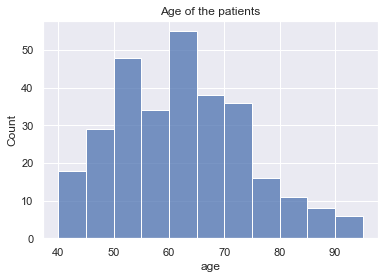

In [23]:
import numpy as np
sns.set_theme(style="darkgrid")
ax = sns.histplot(x="age", data=heart_raw_df, bins=np.arange(40, 100, 5))
ax.set_title('Age of the patients');

The age of the patients range from 40 yrs to 90 yrs out of which patients in the age group of 50 to 70 yrs seem more.  

In [24]:
# Printing values in each age range bin

age_range=heart_raw_df['age'].value_counts(bins=np.arange(40, 100, 10)).to_frame().reset_index()
age_range.rename(columns = {'index':"age_range(from,to)",'age':'patient_count'}, inplace = True)
age_range.set_index('age_range(from,to)')

print("\n")
print("\033[1m" +"Patients in each age range (Max to min)"+ "\033[0m") # to print in bold
age_range



Patients in each age range (Max to min)


,"age_range(from,to)",patient_count
0,"(50.0, 60.0]",88
1,"(60.0, 70.0]",85
2,"(39.999, 50.0]",74
3,"(70.0, 80.0]",34
4,"(80.0, 90.0]",15


The table that has been provided gives the number of patients who are in each age range. It also displays the highest bin value on the top and moves down to the lowest.
* There are 88 patients in the age range of 50 - 60 yrs
* There are 85 patients in the age range of 60 - 70 yrs


* There are 74 patients in the age range of 40 - 50 yrs
* There are 34 patients in the age range of 70 - 80 yrs
* There are 15 patients in the age range of 80 - 90 yrs

So there are more patients in the age ranges of 50 - 70 yrs compared to other ones.

### III. Patient Status 

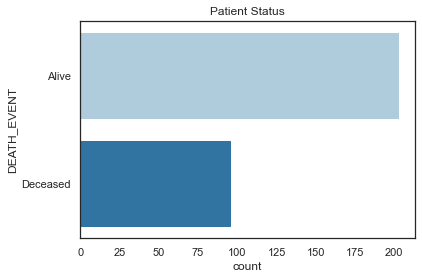

In [25]:
sns.set_style("white")
ax = sns.countplot(y="DEATH_EVENT", data=heart_raw_df, orient='h', palette='Paired')
ax.set_title('Patient Status')
ax.set_yticklabels(['Alive', 'Deceased']);

In [26]:
DEATH_EVENT_df=heart_raw_df['DEATH_EVENT'].value_counts().to_frame()
DEATH_EVENT_df.rename(columns = {'DEATH_EVENT': 'Patient_Count'}, inplace = True)
DEATH_EVENT_df.rename(index={0: 'Alive', 1: 'Deceased'},inplace=True)

print("\n")
print("\033[1m" +"Number of patients who are alive/dead"+ "\033[0m") # to print in bold
DEATH_EVENT_df



Number of patients who are alive/dead


,Patient_Count
Alive,203
Deceased,96


We have 299 records of which there are approximately 203 are alive and 96 are deceased. About 75% of the patients whose data have been collected are alive and only 25% are deceased. 

### IV. Distribution of the continuous variables

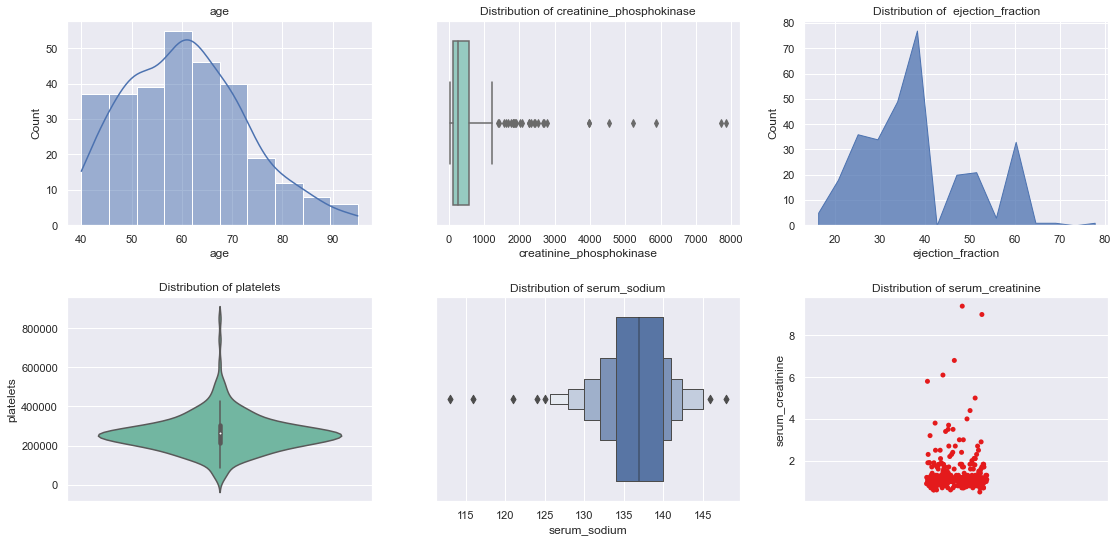

In [27]:
%matplotlib inline

sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(2, 3, figsize=(16, 8))

axes[0,0].set_title('age')
# axes[0,0].hist([heart_raw_df.age], 
#          bins=np.arange(40, 100, 10))
sns.histplot(data=heart_raw_df, x="age", kde=True,ax= axes[0,0])

axes[0,1].set_title('Distribution of creatinine_phosphokinase')
sns.boxplot(x=heart_raw_df["creatinine_phosphokinase"], data=heart_raw_df, orient="h",ax= axes[0,1], palette="Set3")


axes[0,2].set_title('Distribution of  ejection_fraction')
sns.histplot(data=heart_raw_df, x="ejection_fraction",ax= axes[0,2], element="poly")


axes[1,0].set_title('Distribution of platelets')
sns.violinplot(y=heart_raw_df['platelets'], ax= axes[1,0], palette="Set2")

axes[1,1].set_title('Distribution of serum_sodium')
sns.boxenplot(x=heart_raw_df['serum_sodium'],data=heart_raw_df, ax= axes[1,1])

axes[1,2].set_title('Distribution of serum_creatinine')
axes[1,2]=  sns.stripplot(y="serum_creatinine",data=heart_raw_df, palette="Set1")

plt.tight_layout(pad=2);

## Asking and Answering Questions

We've already gained several insights about the respondents by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

### Q: What percentage of the anaemic patients have heart failure?

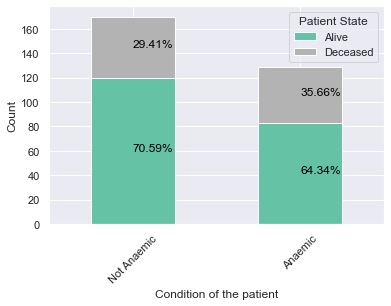

In [28]:
agg_df= heart_raw_df.groupby(['anaemia','DEATH_EVENT']).size().reset_index()  #Grouping both anaemia and death_event
anaemia_agg = agg_df.groupby('anaemia').agg({0: lambda x:list(x)}) #Making a list of both anaemic states 

# Finding sum of list of each anaemic state
sum_list = []
for i in range(len(anaemia_agg[0])):
    sum_list.append(sum(anaemia_agg[0][i]))
    sum_list.append(sum(anaemia_agg[0][i]))
agg_df['sum']=sum_list

# Finding percentage list the agg_df
percentage_list = []
for i in range(len(agg_df[0])):
    answer = agg_df[0][i]*100/agg_df['sum'][i]
    answer = round(answer, 2)
    percentage_list.append(answer)
agg_df['percentage']=percentage_list

#Forming pivot table for plotting
df_plot = heart_raw_df.groupby(['anaemia','DEATH_EVENT']).size().reset_index().pivot(columns='DEATH_EVENT', index='anaemia', values=0)

#Plotting the stacked bar graph 
ax= df_plot.plot(kind='bar', stacked=True, xlabel =('Condition of the patient'),ylabel=('Count'),colormap='Set2')
ax.set_xticklabels(['Not Anaemic', 'Anaemic'], rotation=45);
ax.legend(title='Patient State', labels=['Alive','Deceased' ])

#Adding percentage to the stacked bar graph 
for i,rec in enumerate(ax.patches):
    for i in range(len(agg_df[0])):
        if rec.get_height() == agg_df[0][i]:
            ax.text(rec.get_xy()[0]+rec.get_width()/2,rec.get_xy()[1]+rec.get_height()/2,
                '{:.2%}'.format(agg_df['percentage'][i]/100), fontsize=12, color='black')
            break;

Among the non anaemic patients 70.59% are alive while 29.41% are deceased. Likewise among the anaemic patients 64.34% are alive while 35.66% are deceased. When we compare anaemic patients with the non anaemic ones , patients who are non anaemic clearly have more survival rates than the anaemic ones.  

This shows that anaemia does influence heart disease.

### Q: Does serum sodium level affect the heart and cause heart failure?

Serum sodium is nothing but the amount of sodium in our blood. Generally low serum sodium level (serum sodium concentration of <135 mEq/L ) or hyponatremia is one of the most common biochemical feature in heart failure patients, with a prevalence close to 25%. Let's find out if our data agrees to this medical phenomenon.

In [29]:
# Finding count after grouping by 2 variables (One continuous variable with bin)

serum_sodium_groups = pd.cut(heart_raw_df['serum_sodium'], bins=[110,130, 135,140,150])  # Cut serum_sodium level into 4 parts 

# Apply groupby on each serium sodium group and find the count
serum_sodium_grp_df = heart_raw_df.groupby(['DEATH_EVENT', serum_sodium_groups]).size().reset_index() 


#Rename column and column values
serum_sodium_grp_df.rename(columns = {'serum_sodium':'Serum_sodium_level','DEATH_EVENT':'Patient_State'}, inplace = True)
serum_sodium_grp_df["Patient_State"].replace({0: 'Alive', 1: 'Deceased'}, inplace=True) #Replace boolean values to meaningful ones 


#Using pivot table to present it in more presentable format
serum_sodium_grp_df_op = pd.pivot_table(data=serum_sodium_grp_df, index=['Serum_sodium_level'], columns=['Patient_State'], values=0)
print("\n")
print("\033[1m" +"Number of patients who are alive/dead in each serium sodium range "+ "\033[0m") # to print in bold
serum_sodium_grp_df_op



Number of patients who are alive/dead in each serium sodium range 


Patient_State,Alive,Deceased
Serum_sodium_level,,
"(110, 130]",10,12
"(130, 135]",41,36
"(135, 140]",121,37
"(140, 150]",31,11


Interpreting the table, we find that: 

> In the serum sodium level of 110 to 130 ---> 10 are alive and 12 are dead. 
> And in the serum sodium level of 130 to 135 ---> 41 are alive and 36 are dead.

> In the serum sodium level of 135 to 140 ---> 121 are alive and 37 are dead.
> And in the serum sodium level of 140 to 150 ---> 31 are alive and 11 are dead.

This clearly shows that when the serum sodium levels are low (i.e when serum sodium concentration of <135 mEq/L ) the survival rate of the patients are less. And when the serum sodium levels aren't low (i.e when serum sodium concentration of >135 mEq/L ) the survival rate of the patients are more. Now lets plot the same.

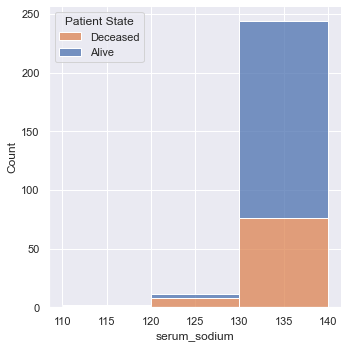

In [30]:
sns.displot(heart_raw_df, x="serum_sodium", hue="DEATH_EVENT", bins=np.arange(110, 150, 10),  multiple="stack", legend=False)
plt.legend(labels=["Deceased","Alive"], title = "Patient State");

Majority of the patients whose serum sodium concentration levels are between 135 to 150 mEq/L are alive. And majority of the patients' whose sodium levels are low are deceased. This shows that low sodium levels weakens the heart and causes its failure. 

### Q: Does high blood pressure affect the heart and cause heart failure?

High blood pressure forces your heart to work harder to pump blood to the rest of your body. So high blood pressure can lead to cardiovascular complications and can weaken or damage your heart. Let's see if our data backs up this fact.

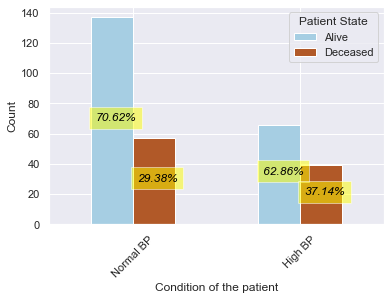

In [31]:
agg_df= heart_raw_df.groupby(['high_blood_pressure','DEATH_EVENT']).size().reset_index()  #Grouping both anaemia and death_event
bp_agg = agg_df.groupby('high_blood_pressure').agg({0: lambda x:list(x)}) #Making a list of both anaemic states 

# Finding sum of list of each anaemic state
sum_list = []
for i in range(len(bp_agg[0])):
    sum_list.append(sum(bp_agg[0][i]))
    sum_list.append(sum(bp_agg[0][i]))
agg_df['sum']=sum_list

# Finding percentage list the agg_df
percentage_list = []
for i in range(len(agg_df[0])):
    answer = agg_df[0][i]*100/agg_df['sum'][i]
    answer = round(answer, 2)
    percentage_list.append(answer)
agg_df['percentage']=percentage_list

#Forming pivot table for plotting
df_plot = heart_raw_df.groupby(['high_blood_pressure','DEATH_EVENT']).size().reset_index().pivot(columns='DEATH_EVENT', index='high_blood_pressure', values=0)

#Plotting the stacked bar graph 
ax= df_plot.plot(kind='bar',  xlabel =('Condition of the patient'),ylabel=('Count'),colormap='Paired')
ax.set_xticklabels(['Normal BP', 'High BP'], rotation=45);
ax.legend(title='Patient State', labels=[ 'Alive','Deceased'])

#Adding percentage to the stacked bar graph 
for i,rec in enumerate(ax.patches):
    for i in range(len(agg_df[0])):
        if rec.get_height() == agg_df[0][i]:
            ax.text(rec.get_xy()[0]+rec.get_width()/2-0.1,rec.get_xy()[1]+rec.get_height()/2,
                '{:.2%}'.format(agg_df['percentage'][i]/100), fontsize=12, color='black',style='italic',
        bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 6})
            break;

Interpreting the data in the plot:

> Among the people who have normal BP , 70.62% are alive and 29.38% are dead

> Among the people who have High BP , 62.86% are alive and 37.14% are dead

Comparing the high BP patients with the normal ones, we can infer that 

> People who have normal BP have more survival rate as 70% of normal BP patients have survived while only 62.86% of the high BP patients have survived.

> People who have High BP have more death rates as 37% of High BP patients are dead while only 29.38% of the normal BP patients are dead.

This shows that high BP does thump the heart patient.

### Q: Does less ejection fraction cause heart failure?

Ejection fraction is the percentage of blood leaving the heart at each contraction. Higher levels of ejection fraction means more the amount of the total blood in the left ventricle is pumped out with each heartbeat. Heart failure with reduced ejection fraction happens when the muscle of the left ventricle is not pumping as well as normal wherein the ejection fraction is less than 35% (https://my.clevelandclinic.org/health/articles/16950-ejection-fraction). Let's find out if our data agrees to this medical phenomenon.

In [32]:
# Finding count after grouping by 2 variables (One continuous variable with bin)

ejection_fraction_groups = pd.cut(heart_raw_df['ejection_fraction'], bins=[13,34,55,80])  # Cut serum_sodium level into 4 parts 

# Apply groupby on each serium sodium group and find the count
ejection_fraction_grp_df = heart_raw_df.groupby(['DEATH_EVENT', ejection_fraction_groups]).size().reset_index() 


#Rename column and column values
ejection_fraction_grp_df.rename(columns = {'ejection_fraction':'ejection_fraction_level','DEATH_EVENT':'Patient_State'}, inplace = True)
ejection_fraction_grp_df["Patient_State"].replace({0: 'Alive', 1: 'Deceased'}, inplace=True) #Replace boolean values to meaningful ones 


#Using pivot table to present it in more presentable format
ejection_fraction_grp_df_op = pd.pivot_table(data=ejection_fraction_grp_df, index=['ejection_fraction_level'], columns=['Patient_State'], values=0)
print("\n")
print("\033[1m" +"Number of patients who are alive/dead in each ejection_fraction range "+ "\033[0m") # to print in bold
ejection_fraction_grp_df_op



Number of patients who are alive/dead in each ejection_fraction range 


Patient_State,Alive,Deceased
ejection_fraction_level,,
"(13, 34]",42,51
"(34, 55]",132,38
"(55, 80]",29,7


Interpreting the table, we find that: 

> In the low ejection_fraction range i.e between 13 to 34 ---> 42 are alive and 51 are dead. 

> In the ejection_fraction ranges i.e between 34 to 55 ---> 132 are alive and 38 are dead.
> In the ejection_fraction level of 55 to 80 ---> 29 are alive and 7 are dead.

This clearly shows that when the ejection fraction is less (i.e when ejection fraction is less than 35% ) many patients are deceased. Also when the ejection fraction isn't less (i.e when ejection fraction is greater than 35% ) more patients are alive. Now lets plot the same.

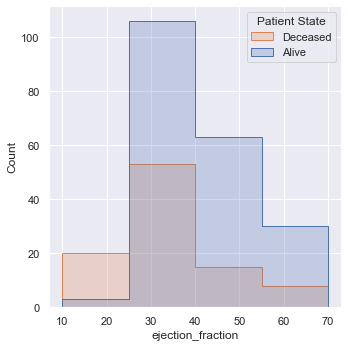

In [33]:
sns.displot(heart_raw_df, x="ejection_fraction", hue="DEATH_EVENT", bins=np.arange(10, 80, 15), element="step", legend=False)
plt.legend(labels=["Deceased","Alive"], title = "Patient State");

When the ejection fraction levels of the patients are increasing the mortality rates are slowly decreasing. This shows that low ejection fraction levels causes heart failure. 

### Q: What is the risk of heart failure in male and female diabetic smokers?  

Heart failure can be caused by any one of the given attributes/factors in the dataset or it can be caused by combination of two or more factors. Diabetes can contribute to the development of structural heart disease and heart failure via systemic, myocardial, and cellular mechanisms. Smoking is also believed to play a vital role in trigger of heart failure. When we combine these factors we might get interesting results. Lets check them out. 

No handles with labels found to put in legend.


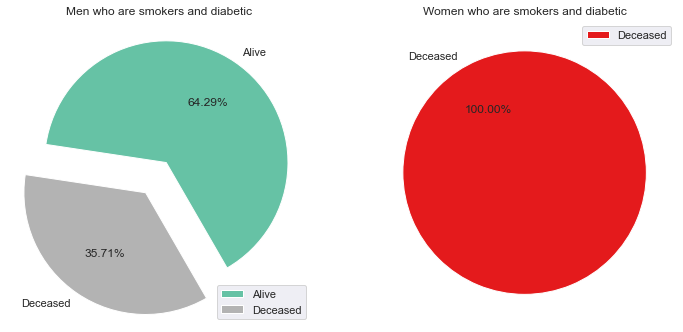

In [34]:
#Grouping data based smoker, diabetic, sex and death_event 


grp_df2= heart_raw_df.groupby(['smoking','diabetes','sex','DEATH_EVENT']).size().to_frame('size').reset_index()  

#Selecting diabetic smokers
smoker_diabetic_female=grp_df2.loc[(grp_df2['smoking'] == 1) & (grp_df2['diabetes'] == 1) & (grp_df2['sex'] == 0)]
smoker_diabetic_male=grp_df2.loc[(grp_df2['smoking'] == 1) & (grp_df2['diabetes'] == 1) & (grp_df2['sex'] == 1)]

#Plotting the diabetic smokers based on gender and death status
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

smoker_diabetic_male.plot(kind='pie', colormap='Set2',autopct='%.2f%%', ylabel='', explode=(0.1,0.2),
              startangle=300,title ='Men who are smokers and diabetic',y='size',labels=['Alive','Deceased' ],ax=axes[0])
plt.legend(bbox_to_anchor=(1.0, 1.0));


smoker_diabetic_female.plot(kind='pie', colormap='Set1',autopct='%.2f%%', ylabel='',startangle=300,
              labels=['Deceased','Alive' ], title ='Women who are smokers and diabetic',y='size',ax=axes[1])
plt.legend(bbox_to_anchor=(1.0, 1.0));

From the plot we find that among the smokers who are diabetic as well

> Men - 64.29% are alive and 35.71% of the patients had heart failure and are deceased. 

> Women  - None of the diabetic smokers survived. 100% deceased.

This shows when diabetic smokers are female the survival rates are low compared to diabetic smokers who are male.

### Q: Can heart failure occur with high creatinine levels ?

#### Creatinine
Creatinine is a waste product in your blood that comes from your muscles. Patients with severe heart failure, particularly those on large doses of diuretics for long periods may have higher creatinine levels. For more details click [here](https://www.medscape.com/answers/163062-86254/what-is-the-role-of-renal-function-tests-in-the-diagnosis-of-heart-failure). We have creatine phosphokinase and serum creatinine in our dataset. 

##### Creatine kinase or creatine phosphokinase
Creatine kinase or creatine phosphokinase is an enzyme chiefly found in the brain, skeletal muscles, and heart. Generally an elevated level of creatine kinase is seen in heart attacks, when the heart muscle is damaged, or in conditions that produce damage to the skeletal muscles or brain. 

Creatine phosphokinase (CPK) elevations are frequently classified as mild, moderate, or severe. These classifications roughly correspond to less than 10 times the upper limit of normal (or 2,000 IU/L), 10 to 50 times the upper limit of normal (or 2,000 IU/L to 10,000 IU/L), and greater than 50 times the upper limit of normal (or greater than 10,000 IU/L), respectively (2). The risk of renal failure increases above 5,000 to 6,000 IU/L. For more details click [here](https://www.clinicalcorrelations.org/2010/11/03/creatine-kinase-how-much-is-too-much/)

##### Serum creatinine
Serum creatinine level is based on a blood test that measures the amount of creatinine in your blood. In general, elevated serum creatinine i.e serum creatinine level ≥354 µmol/L (≥4 mg/dL) has been associated with increased mortality in hypertensive persons, the elderly, and patients with heart failure or stroke in whom cardiovascular disease is the major cause of death. For more details click [here](https://academic.oup.com/eurheartj/article/33/17/2135/483602)

So according to medical observations, elevated levels of creatine phosphokinase i.e creatine phosphokinase level greater than 5,000 IU/L and elevated levels of serum creatinine i.e creatine phosphokinase level greater than ≥4 mg/dL have been associated with heart disease. Let's check out the same. 

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
D:\Anaconda\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


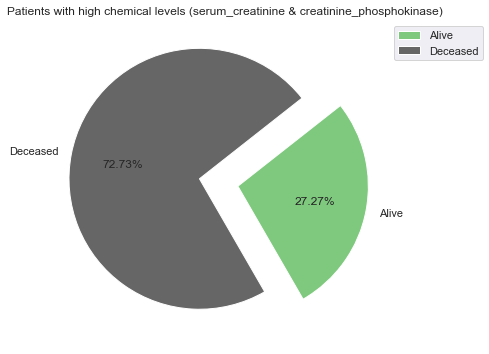

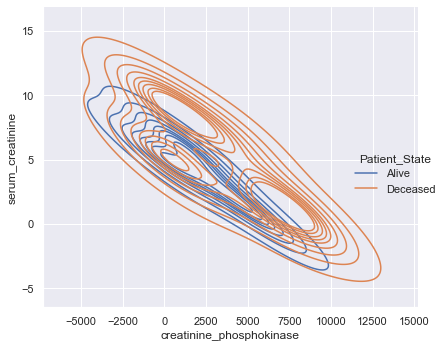

In [35]:
#Grouping data based serum_creatinine, creatinine_phosphokinase and death_event 
grp_df2= heart_raw_df.groupby(['serum_creatinine','creatinine_phosphokinase','DEATH_EVENT']).size().to_frame('size').reset_index()  

#Selecting Patients with high chemical levels (serum_creatinine & creatinine_phosphokinase)
high_chemical_level=grp_df2.loc[ (grp_df2['serum_creatinine'] > 4) | (grp_df2['creatinine_phosphokinase'] > 5000)]

#Grouping them based on alive/dead
grp_df3= high_chemical_level.groupby(['DEATH_EVENT']).size().to_frame('size').reset_index()



#Plotting the group in pie chart
ax= grp_df3.plot(kind='pie', colormap='Accent',autopct='%.2f%%', ylabel='', explode=(0.1,0.2), startangle=300, figsize=(10,6),
             title ='Patients with high chemical levels (serum_creatinine & creatinine_phosphokinase)',y='size',labels=['Alive','Deceased'])
plt.legend(bbox_to_anchor=(1.0, 1.0));


#Rename column and column values
high_chemical_level.rename(columns = {'DEATH_EVENT':'Patient_State'}, inplace = True)
high_chemical_level["Patient_State"].replace({0: 'Alive', 1: 'Deceased'}, inplace=True) #Replace boolean values to meaningful ones 

sns.displot(high_chemical_level, x="creatinine_phosphokinase", y="serum_creatinine",
            hue="Patient_State", kind="kde",legend=True);

plt.tight_layout()

From the pie chart it is clear that 72.73% of patients with high levels of serum_creatinine and creatinine_phosphokinase are deaceased. And only 27.27% of these patients are alive. This shows that higher levels does cause heart failure. 

From the second plot it is evident that as the creatinine levels increases, the death rate also increases subsequently. This again shows that higher creatinine levels cause heart failure and reduce survial rates. 

### Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of them:

-  Based on the heart disease survey respondents' data, this survey is somewhat representative of all the major attributes that are responsible for the heart disease. However the patient data could have been more diverse in terms of age, gender, number of respondents and death status. 


-  The patient data corroborates some of the major medical observations of heart disease and they are:

    * Low serum sodium level (serum sodium concentration of <135 mEq/L ) or hyponatremia is one of the most common biochemical feature in heart failure patients, with a prevalence close to 25%. 
    
    * When the ejection fraction is less (i.e when ejection fraction is less than 35% ) many patients are deceased. Also when the ejection fraction isn't less (i.e when ejection fraction is greater than 35% ) more patients are alive.
    
    * Elevated levels of creatine phosphokinase( i.e creatine phosphokinase level greater than 5,000 IU/L ) and elevated levels of serum creatinine( i.e creatine phosphokinase level greater than ≥4 mg/dL ) have been associated with heart failure. 
    
    
-  Heart failures were more when the patients had High BP. Anaemia also seemed to affect the heart function and cause its failure.


-  Smoking and diabetes are some of the well believed triggers of the heart disease. But when diabetic smokers are female the survival rates are low compared to diabetic smokers who are male.


*  Learning the possible reasons for heart failure is a real eye opener. What is more important is to prevent them and lead happy life with good heart.

### References and Future Work

* Tanvir Ahmad, Assia Munir, Sajjad Haider Bhatti, Muhammad Aftab, and Muhammad Ali Raza: "Survival analysis of heart failure patients: a case study". PLoS ONE 12(7), 0181001 (2017). [Web Link](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001)

* Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). [Web Link](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)